In [31]:
#*** --- Data Preparation & Cleaning --- ***

In [32]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [33]:
# Load the data
df = pd.read_csv('Synthetic_Software_Sales_Data.csv', parse_dates=['Date of Sale'], dayfirst=True)

In [34]:
# Display the first 5 rows of the DataFrame
df.head()

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer
0,2022-01-01,South America,CRM,Partner,Business,7723.0,16.0,793.0,Yes
1,2022-01-02,Australia,DevTools,Partner,Consumer,8681.0,15.0,725.0,Yes
2,2022-01-03,Asia,DevTools,Partner,Consumer,5240.0,8.0,587.0,No
3,2022-01-04,Australia,Database,Partner,Business,9933.0,15.0,1810.0,Yes
4,2022-01-05,Australia,CRM,Online,Consumer,215.0,1.0,933.0,Yes


In [35]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date of Sale            3650 non-null   datetime64[ns]
 1   Region                  3650 non-null   object        
 2   Product Type            3650 non-null   object        
 3   Sales Channel           3650 non-null   object        
 4   Customer Type           3650 non-null   object        
 5   Sales Amount in US$     3650 non-null   float64       
 6   Units Sold              3650 non-null   float64       
 7   Marketing Spend in US$  3650 non-null   float64       
 8   Returning Customer      3650 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 185.5+ KB


In [36]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Date of Sale              1
Region                    1
Product Type              1
Sales Channel             1
Customer Type             1
Sales Amount in US$       1
Units Sold                1
Marketing Spend in US$    1
Returning Customer        1
dtype: int64


In [37]:
# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

In [38]:
#show duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3646    False
3647    False
3648    False
3649    False
3650     True
Length: 3651, dtype: bool

In [39]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [40]:
# Convert data types
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])

In [41]:
# Verify the date parsing
print(df['Date of Sale'].head())

0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
Name: Date of Sale, dtype: datetime64[ns]


In [42]:
# Create new calculated fields
df['Revenue per Unit'] = df['Sales Amount in US$'] / df['Units Sold']

In [43]:
# Save cleaned data
df.to_csv('cleaned_sales_data.csv', index=False)

In [44]:
#*** --- Exploratory Data Analysis --- ***

In [45]:
# Summary statistics for numerical columns
df.describe()

,Sales Amount in US$,Units Sold,Marketing Spend in US$,Revenue per Unit
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,5056.085205,10.020548,1242.615616,958.512548
std,2844.504925,5.504562,433.094913,1453.031714
min,101.000000,1.000000,500.000000,7.875000
25%,2636.250000,5.000000,863.000000,257.200000
50%,5066.000000,10.000000,1241.500000,505.071429
75%,7462.000000,15.000000,1615.750000,946.208333
max,9998.000000,19.000000,2000.000000,9998.000000


In [46]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,Region,Product Type,Sales Channel,Customer Type,Returning Customer
count,3650,3650,3650,3650,3650
unique,5,5,3,2,2
top,South America,CRM,Online,Consumer,No
freq,755,762,1248,1859,1827


In [47]:
# Unique values in each categorical column
print(df['Region'].unique())
print(df['Product Type'].unique())
print(df['Sales Channel'].unique())
print(df['Customer Type'].unique())

['South America' 'Australia' 'Asia' 'Europe' 'North America']
['CRM' 'DevTools' 'Database' 'Antivirus' 'ERP']
['Partner' 'Online' 'Direct Sales']
['Business' 'Consumer']


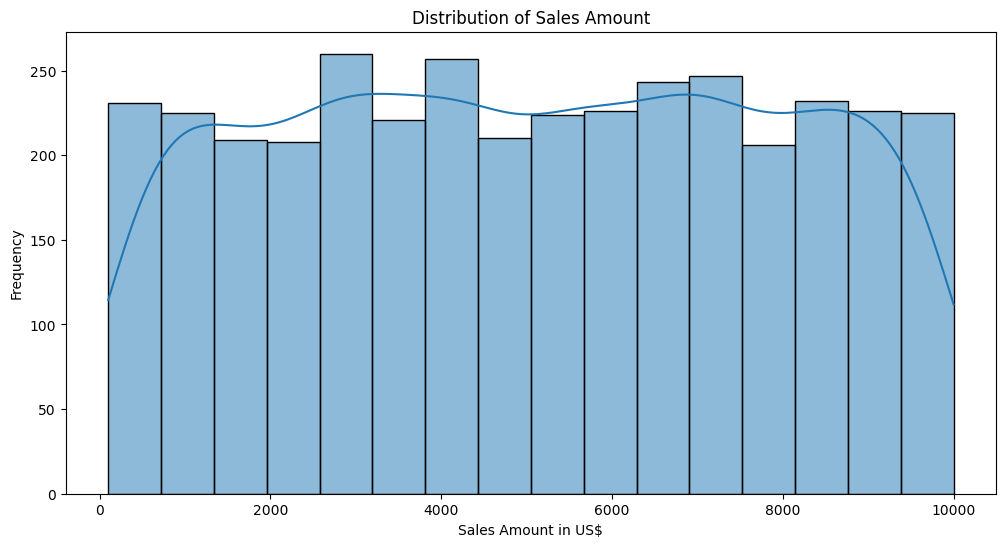

In [48]:
# Histogram of Sales Amount
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales Amount in US$'], kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount in US$')
plt.ylabel('Frequency')
plt.show()

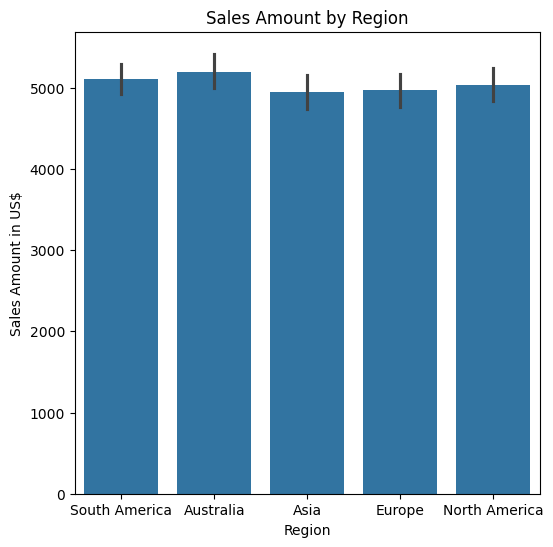

In [49]:
# Boxplot of Sales Amount by Region
plt.figure(figsize=(6, 6))
sns.barplot(x='Region', y='Sales Amount in US$', data=df)
plt.title('Sales Amount by Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount in US$')
plt.show()

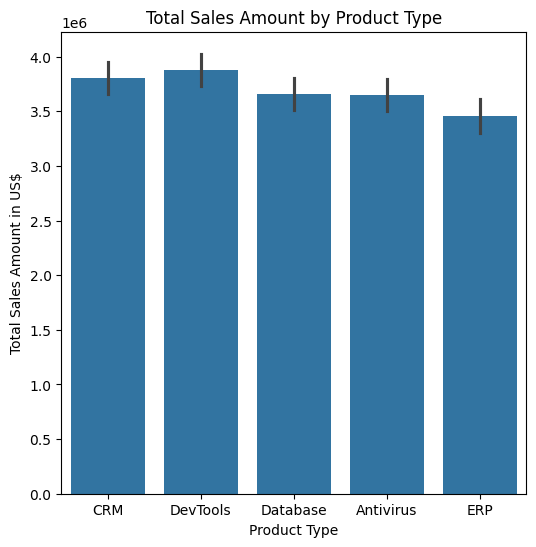

In [50]:
# Bar plot of total Sales Amount by Product Type
plt.figure(figsize=(6, 6))
sns.barplot(x='Product Type', y='Sales Amount in US$', data=df, estimator=sum)
plt.title('Total Sales Amount by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales Amount in US$')
plt.show()

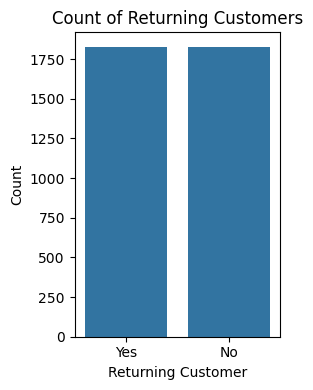

In [51]:
# Returning Customer analysis
plt.figure(figsize=(3, 4))
sns.countplot(x='Returning Customer', data=df)
plt.title('Count of Returning Customers')
plt.xlabel('Returning Customer')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

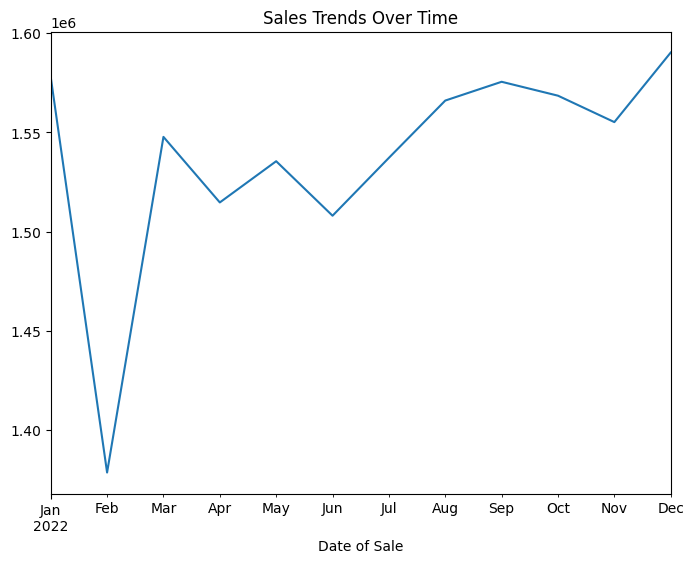

In [52]:
# Sales Trends Over Time
plt.figure(figsize=(8, 6))
df.set_index('Date of Sale').resample('M')['Sales Amount in US$'].sum().plot()
plt.title('Sales Trends Over Time')
plt.show()

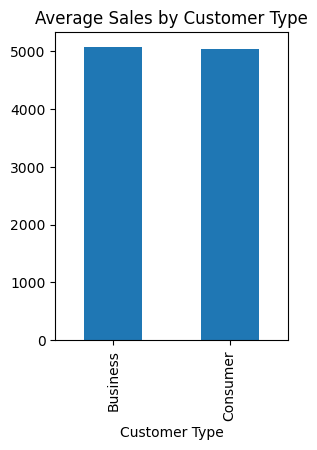

In [53]:
# Customer Purchase Patterns
plt.figure(figsize=(3,4))
customer_sales = df.groupby('Customer Type')['Sales Amount in US$'].mean()
customer_sales.plot(kind='bar')
plt.title('Average Sales by Customer Type')
plt.show()

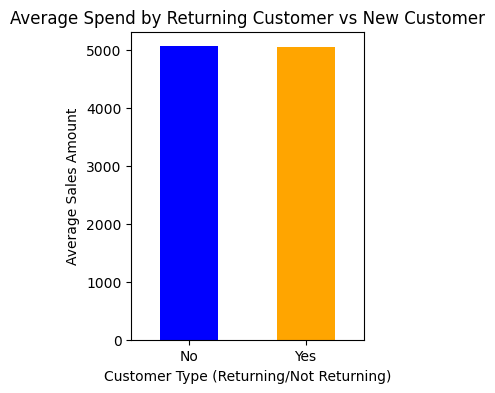

In [54]:
# Average Spend by Returning Customer vs New Customer
plt.figure(figsize=(3, 4))
average_spend = df.groupby('Returning Customer')['Sales Amount in US$'].mean()
average_spend.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Spend by Returning Customer vs New Customer')
plt.xlabel('Customer Type (Returning/Not Returning)')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=0)
plt.show()

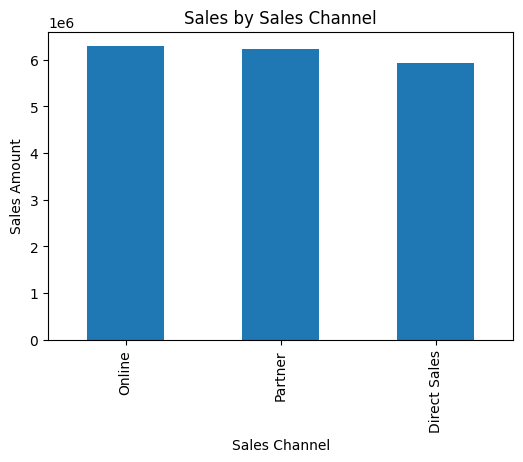

In [55]:
# Sales by Sales Channel
plt.figure(figsize=(6, 4))
sales_channel = df.groupby('Sales Channel')['Sales Amount in US$'].sum().sort_values(ascending=False)
sales_channel.plot(kind='bar')
plt.title('Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Sales Amount')
plt.show()

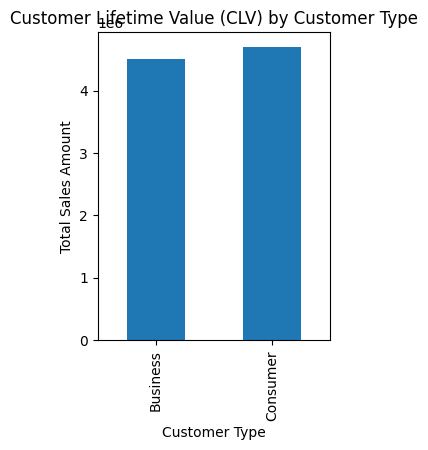

In [56]:
# Customer Lifetime Value (CLV)
clv = df[df['Returning Customer'] == 'Yes'].groupby('Customer Type')['Sales Amount in US$'].sum()
plt.figure(figsize=(3, 4))
clv.plot(kind='bar')
plt.title('Customer Lifetime Value (CLV) by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales Amount')
plt.show()

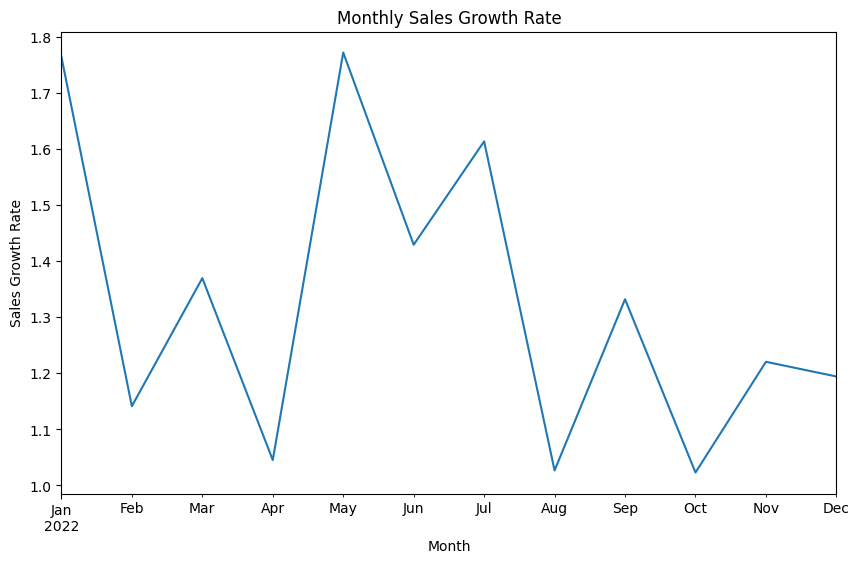

In [57]:
# Sales Growth Rate
df['YearMonth'] = df['Date of Sale'].dt.to_period('M')
df['Sales Growth'] = df.groupby('YearMonth')['Sales Amount in US$'].pct_change()
monthly_growth = df.groupby('YearMonth')['Sales Growth'].mean()
plt.figure(figsize=(10, 6))
monthly_growth.plot(kind='line')
plt.title('Monthly Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Sales Growth Rate')
plt.show()

In [58]:
#*** --- Predictive Modelling --- ***

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date of Sale            3650 non-null   datetime64[ns]
 1   Region                  3650 non-null   object        
 2   Product Type            3650 non-null   object        
 3   Sales Channel           3650 non-null   object        
 4   Customer Type           3650 non-null   object        
 5   Sales Amount in US$     3650 non-null   float64       
 6   Units Sold              3650 non-null   float64       
 7   Marketing Spend in US$  3650 non-null   float64       
 8   Returning Customer      3650 non-null   object        
 9   Revenue per Unit        3650 non-null   float64       
 10  YearMonth               3650 non-null   period[M]     
 11  Sales Growth            3638 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5), per

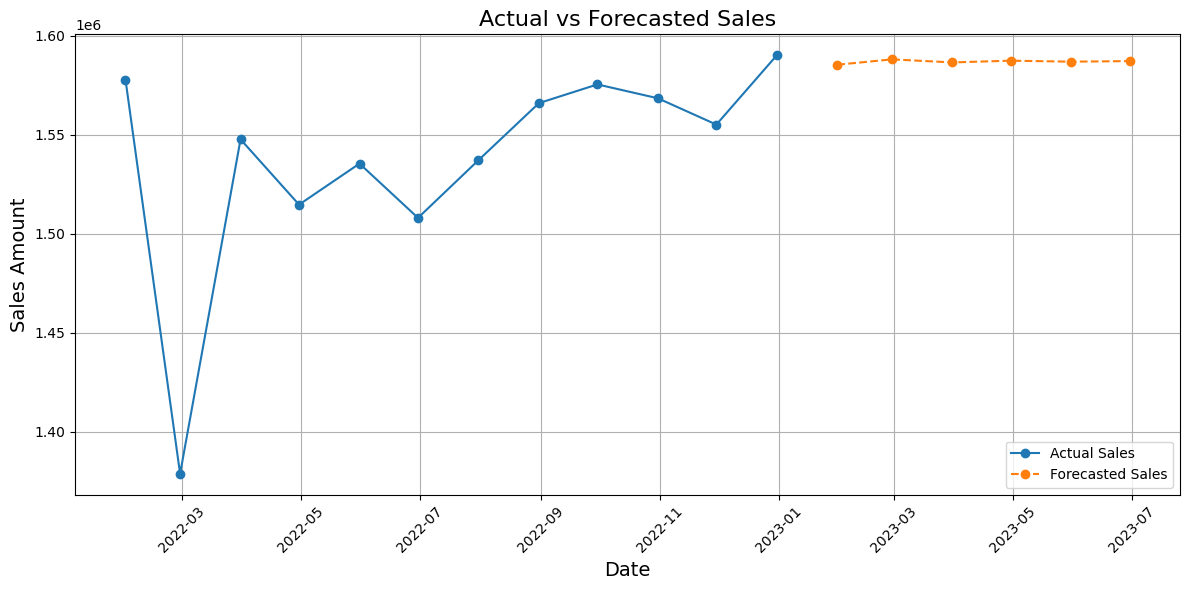

Forecasted Sales for the next 3 months:
            Forecasted Sales
Date                        
2023-01-31      1.585387e+06
2023-02-28      1.588112e+06
2023-03-31      1.586562e+06
2023-04-30      1.587443e+06
2023-05-31      1.586942e+06
2023-06-30      1.587227e+06


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Assuming df is your cleaned and prepared dataset
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df.set_index('Date of Sale', inplace=True)

# Aggregate sales by month
monthly_sales = df.resample('M')['Sales Amount in US$'].sum()

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))  # Example order, you can tune this
model_fit = model.fit()

# Forecast next 3 months (change periods=3 to change number of months)
forecast = model_fit.forecast(steps=6)

# Generate dates for the forecasted period
last_date = monthly_sales.index[-1]
forecast_dates = [last_date + pd.DateOffset(months=i+1) for i in range(6)]

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Sales': forecast
})
forecast_df.set_index('Date', inplace=True)

# Convert forecasted sales to millions for better readability
forecast_df['Forecasted Sales (Millions)'] = forecast_df['Forecasted Sales'] / 1e6

# Print forecasted values
print("Forecasted Sales for the next 3 months (Millions):")
print(forecast_df[['Forecasted Sales (Millions)']])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values / 1e6, label='Actual Sales (Millions)', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'] / 1e6, label='Forecasted Sales (Millions)', linestyle='--', marker='o')
plt.title('Actual vs Forecasted Sales (Millions)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount (Millions)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()